======================================================================================

# TASK 3: Linear Regression - Housing Price Prediction Dataset

======================================================================================

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Step 2: Load and Explore Dataset

In [3]:
df = pd.read_csv("Housing.csv")

In [4]:
# First 5 rows
print("First 5 rows of dataset:")
display(df.head())

First 5 rows of dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# Basic info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [6]:
# Summary statistics
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
# Check missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


## Step 3: Data Preprocessing

In [8]:
# Convert categorical columns to numeric (if any)
df_encoded = pd.get_dummies(df, drop_first=True)

In [9]:
print("\nDataset after Encoding:")
display(df_encoded.head())


Dataset after Encoding:


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


## Step 4: Simple Linear Regression

In [11]:
"""
We will predict 'price' based on one independent variable:
    - X: area
    - y: price
"""
# Features & target
X_simple = df_encoded[['area']]
y = df_encoded['price']

In [13]:
# Train-Test Split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

In [14]:
# Model training
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)

LinearRegression()

In [15]:
# Predictions
y_pred_s = model_simple.predict(X_test_s)

In [16]:
# Evaluation
mae_s = mean_absolute_error(y_test_s, y_pred_s)
mse_s = mean_squared_error(y_test_s, y_pred_s)
r2_s = r2_score(y_test_s, y_pred_s)

In [17]:
print("\nSimple Linear Regression Metrics:")
print(f"MAE: {mae_s:.2f}")
print(f"MSE: {mse_s:.2f}")
print(f"R²: {r2_s:.4f}")


Simple Linear Regression Metrics:
MAE: 1474748.13
MSE: 3675286604768.19
R²: 0.2729


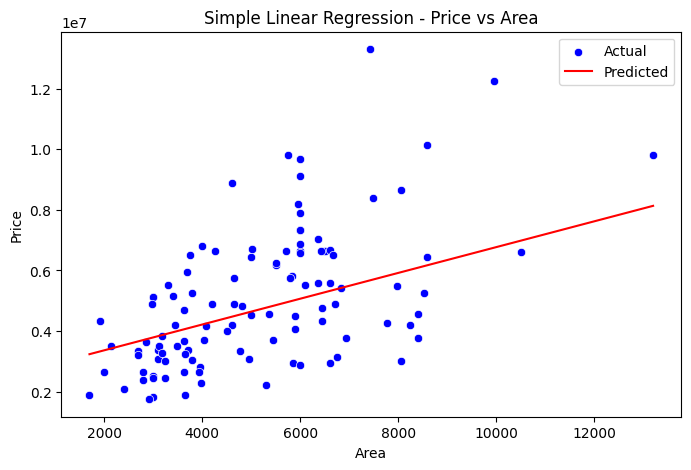

In [18]:
# Plot regression line
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test_s['area'], y=y_test_s, color='blue', label='Actual')
sns.lineplot(x=X_test_s['area'], y=y_pred_s, color='red', label='Predicted')
plt.title("Simple Linear Regression - Price vs Area")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.show()

## Step 5: Multiple Linear Regression

In [19]:
"""
We will predict 'price' based on multiple independent variables:
    - X: area, bedrooms, bathrooms, stories
    - y: price
"""

X_multi = df_encoded[['area', 'bedrooms', 'bathrooms', 'stories']]
y_multi = df_encoded['price']

In [20]:
# Train-Test Split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

In [21]:
# Model training
model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)

LinearRegression()

In [22]:
# Predictions
y_pred_m = model_multi.predict(X_test_m)

In [23]:
# Evaluation
mae_m = mean_absolute_error(y_test_m, y_pred_m)
mse_m = mean_squared_error(y_test_m, y_pred_m)
r2_m = r2_score(y_test_m, y_pred_m)

In [24]:
print("\nMultiple Linear Regression Metrics:")
print(f"MAE: {mae_m:.2f}")
print(f"MSE: {mse_m:.2f}")
print(f"R²: {r2_m:.4f}")


Multiple Linear Regression Metrics:
MAE: 1158970.48
MSE: 2457741642022.09
R²: 0.5138


In [26]:
# Coefficients
coeff_df = pd.DataFrame(model_multi.coef_, X_multi.columns, columns=['Coefficient'])
print("\nCoefficients for Multiple Regression:")
display(coeff_df)


Coefficients for Multiple Regression:


,Coefficient
area,3.490097e+02
bedrooms,1.746851e+05
bathrooms,1.258151e+06
stories,4.838597e+05


Step 6: Results & Interpretation

In [27]:
results = pd.DataFrame({
    "Model": ["Simple LR (Area)", "Multiple LR (Area, Bedrooms, Bathrooms, Stories)"],
    "MAE": [mae_s, mae_m],
    "MSE": [mse_s, mse_m],
    "R²": [r2_s, r2_m]
})
print("\nComparison of Models:")
display(results)

"""
Interpretation:
- R² closer to 1 → better fit
- MAE & MSE smaller → better predictions
- Multiple Linear Regression usually performs better when multiple relevant features are used.
"""


Comparison of Models:


,Model,MAE,MSE,R²
0,Simple LR (Area),1.474748e+06,3.675287e+12,0.272879
1,"Multiple LR (Area, Bedrooms, Bathrooms, Stories)",1.158970e+06,2.457742e+12,0.513759


'\nInterpretation:\n- R² closer to 1 → better fit\n- MAE & MSE smaller → better predictions\n- Multiple Linear Regression usually performs better when multiple relevant features are used.\n'